In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#roc curve, auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [17]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Postive Rate')
    plt.title('Receiver Operating Characterisitc (ROC)curve')
    plt.legend()
    plt.show()

In [7]:
data_X,class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1],random_state=1)

In [8]:
trainX,testX,trainy,testy = train_test_split(data_X,class_label,test_size=0.3,random_state=1)

In [9]:
model =KNeighborsClassifier()
model.fit(trainX,trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
probs = model.predict_proba(testX)
probs = probs[:,1]

In [13]:
roc =roc_curve(testy,probs)
print('ROC:{}'.format(roc))
auc = roc_auc_score(testy,probs)
print('AUC:%.2f'%auc)

ROC:(array([0.        , 0.01408451, 0.0915493 , 0.18309859, 0.33098592,
       0.5       , 1.        ]), array([0.        , 0.2721519 , 0.65189873, 0.89873418, 0.98101266,
       0.99367089, 1.        ]), array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))
AUC:0.91


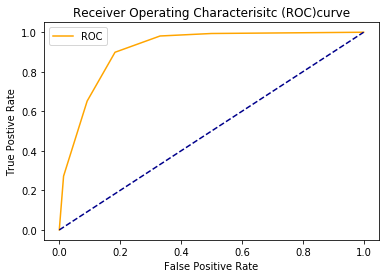

In [18]:
fpr,tpr,thrsholds = roc_curve(testy,probs)
plot_roc_curve(fpr,tpr)

K-fold corss

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris =load_iris()
KNN = KNeighborsClassifier()
score = cross_val_score(KNN,iris.data,iris.target)
print("교차검증 점수:",score)

교차검증 점수: [0.98039216 0.98039216 1.        ]


C:\ProgramData\Anaconda3\envs\mypy\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [22]:
score = cross_val_score(KNN,iris.data,iris.target,cv=5)
print("교차 검증 점수:",score)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [28]:
from sklearn.model_selection import cross_validate
res= cross_validate(KNN,iris.data,iris.target,cv=5,return_train_score=True)
display(res)

{'fit_time': array([0.        , 0.00049496, 0.00049591, 0.        , 0.00053144]),
 'score_time': array([0.00198627, 0.00148845, 0.00199962, 0.00148845, 0.00145364]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667])}

LOOCV

In [31]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(KNN,iris.data,iris.target,cv=loo)
print("교차검증 분할 횟수: ",len(scores))
print("평균 정확도: {:2f}".format(scores.mean()))

교차검증 분할 횟수:  150
평균 정확도: 0.966667


SSCV

In [32]:
from sklearn.model_selection import ShuffleSplit
Shuffle_Split = ShuffleSplit(test_size=.5,train_size=.5,n_splits=10)
scores =cross_val_score(KNN,iris.data,iris.target,cv=Shuffle_Split)
scores

array([0.98666667, 0.97333333, 0.93333333, 0.97333333, 0.96      ,
       0.97333333, 0.98666667, 0.96      , 1.        , 0.97333333])

## Grid  search
- 매개변수를 튜닝(조절)하는 메서드

In [40]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print("훈련 세트의 크기:{} 테스트 세트의 크기: {}".format(X_train.shape[0],X_test.shape[0]))
best_score = 0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm =SVC(gamma=gamma ,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score>best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수: {:.2f}".format(best_score))
print("최적 매개변수: ",best_parameters)


훈련 세트의 크기:112 테스트 세트의 크기: 38
최고 점수: 0.97
최적 매개변수:  {'C': 100, 'gamma': 0.001}


Valid 데이터 셋까지 나눠서 해보자.

In [51]:
X_trainval,X_test,y_trainval,y_test = train_test_split(iris.data,iris.target,random_state=0)
#X_train,X_valid,y_train,y_valid = train_test_split(X_trainval,y_trainval,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_trainval,y_trainval,random_state=1)
print("훈련 세트의 크기:{} 검증 세트의 크기: {} 테스트 세트의 크기: {}"
      .format(X_train.shape[0],X_valid.shape[0],X_test.shape[0]))
best_score =0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm =SVC(gamma=gamma ,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_valid,y_valid)
        if score>best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test,y_test)
print("검증 세트에서 최고 점수:{:.2f}".format(best_score))
print("최적 매개변수:",best_parameters)
print("최적 매개변수에서 테스트 세트 점수:{:.2f}".format(test_score))


훈련 세트의 크기:84 검증 세트의 크기: 28 테스트 세트의 크기: 38
검증 세트에서 최고 점수:0.96
최적 매개변수: {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수:0.92
